### **Project Objective**
The main objective of this project is to **predict the sale price of residential houses** in Ames, Iowa, using a dataset with 79 explanatory variables that describe various attributes of the houses.

The goal is to develop a **robust regression model** to accurately predict house prices for unseen data (test set) while minimizing the **Root Mean Squared Error (RMSE)** between the logarithm of the predicted and actual prices. 

---

### **Guiding Questions for the Project**

#### **1. Understanding the Data**
   - What are the features provided in the dataset, and what do they represent?
   - How many numerical, categorical, and missing data columns exist in the dataset?
   - What does the distribution of the target variable (`SalePrice`) look like?
   - Is there any skewness in `SalePrice` that requires a transformation?

#### **2. Data Cleaning and Preprocessing**
   - How do we handle missing values for both numerical and categorical variables?
   - Are there any outliers or anomalies in the data that need to be treated?
   - How do we encode categorical variables to make them suitable for machine learning models?
   - Are there highly correlated features that might cause multicollinearity?

#### **3. Feature Exploration and Engineering**
   - What features are most strongly correlated with `SalePrice`?
   - Can we create new features (e.g., total square footage, age of the house) to improve model performance?
   - Should we combine similar features, such as basement areas and first/second-floor square footage?

#### **4. Model Selection and Training**
   - Which regression algorithms should we use to predict house prices? 
     - Decision Trees and Random Forests?
     - Gradient Boosting methods like XGBoost or LightGBM?
   - How do we split the data into training and validation sets to ensure fair evaluation?
   - How do we evaluate model performance, and what metric will we use? (RMSE of log-transformed prices)

#### **5. Model Tuning and Improvement**
   - How can we optimize the hyperparameters of the chosen models?
   - Can we use ensemble techniques (stacking, blending) to improve prediction accuracy?
   - How well does the model generalize to unseen data (test set)?

#### **6. Project Evaluation and Insights**
   - What insights can we derive about the most important factors influencing house prices?
   - How does the model perform on test data, and where could it be further improved?

---

### **Project Overview**
1. **Define the Problem**: Predict house prices using the Ames dataset with an RMSE-based evaluation.
2. **Exploratory Data Analysis (EDA)**: Understand data structure, clean data, and explore relationships.
3. **Data Preprocessing**: Handle missing values, encode categorical variables, and scale/transform data.
4. **Feature Engineering**: Identify and create features that add value to the model.
5. **Model Development**: Train and evaluate different regression models to predict `SalePrice`.
6. **Model Optimization**: Tune hyperparameters and explore ensemble methods for better performance.
7. **Insights and Results**: Present model performance and derive actionable insights.

## Load the Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
train_data = pd.read_csv("train.csv")  # Replace with your train.csv path
test_data = pd.read_csv("test.csv")   # Replace with your test.csv path

# Display the first few rows of the training data
print("Training Data Overview:")
display(train_data.head())

print("\nTest Data Overview:")
display(test_data.head())

Training Data Overview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Test Data Overview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Understanding the Data

In [2]:
# Check basic info of datasets
print("Training Data Info:")
train_data.info()

print("\nTest Data Info:")
test_data.info()

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

## Data Cleaning and Preprocessing

### Handle Missing Values

Columns with excessive missing data (50% or more):

In [3]:
# Calculate missing value percentages
missing_percentage = train_data.isnull().mean() * 100

# Identify columns with 50% or more missing values
cols_to_drop = missing_percentage[missing_percentage >= 50].index
print(f"Columns with 50% or more missing values:\n{cols_to_drop}")

# Drop the columns from both train and test datasets
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

# Verify the datasets
print(f"Remaining columns in training data: {train_data.shape[1]}")
print(f"Remaining columns in test data: {test_data.shape[1]}")

Columns with 50% or more missing values:
Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
Remaining columns in training data: 76
Remaining columns in test data: 75


After dropping columns, re-checking for missing values in the dataset:

In [4]:
# Check missing values again
train_missing = train_data.isnull().sum().sort_values(ascending=False)
test_missing = test_data.isnull().sum().sort_values(ascending=False)

print("Remaining Missing Values in Training Data:")
print(train_missing[train_missing > 0])
print("\nRemaining Missing Values in Test Data:")
print(test_missing[test_missing > 0])

Remaining Missing Values in Training Data:
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageQual       81
GarageFinish     81
GarageType       81
GarageCond       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64

Remaining Missing Values in Test Data:
FireplaceQu     730
LotFrontage     227
GarageCond       78
GarageFinish     78
GarageYrBlt      78
GarageQual       78
GarageType       76
BsmtCond         45
BsmtQual         44
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
MasVnrArea       15
MSZoning          4
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
Exterior1st       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
KitchenQual       1
SaleType          1
GarageCars        1
GarageArea        1
Exterior2nd       1
TotalBsmtSF       1
dtype: int64


### **1. Training and Test Data Overlap**
The columns with missing values are common between the training and test data. We’ll handle these consistently, with adjustments for test-specific cases.

---

### **2. Handling Missing Values Based on Column Descriptions**

#### **2.1 `FireplaceQu`**
- **Description**: Fireplace quality. Missing values likely mean no fireplace.
- **Strategy**: Fill with `"None"`.

#### **2.2 `LotFrontage`**
- **Description**: Linear feet of street connected to property. Missing values likely occur due to irregularities in data recording for certain properties.
- **Strategy**: Fill with the **median LotFrontage grouped by `Neighborhood`**, as frontage is often correlated with neighborhood.

#### **2.3 `Garage*` Columns**
- **`GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `GarageYrBlt`**
- **Description**: Details about the garage. Missing values indicate no garage.
- **Strategy**: 
  - Fill categorical columns with `"None"`.
  - Fill `GarageYrBlt` with `0`.

#### **2.4 `Bsmt*` Columns**
- **`BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`**
- **Description**: Details about the basement. Missing values likely mean no basement.
- **Strategy**:
  - Fill categorical columns with `"None"`.
  - Fill numerical basement-related columns with `0`.

#### **2.5 `MasVnrArea`**
- **Description**: Masonry veneer area. Missing values indicate no veneer.
- **Strategy**: Fill with `0`.

#### **2.6 `Electrical`**
- **Description**: Electrical system type. Only one missing value in the training data.
- **Strategy**: Fill with the mode.

#### **2.7 `MSZoning` (Test Data Only)**
- **Description**: General zoning classification. Missing values occur in a few test entries.
- **Strategy**: Fill with the mode.

#### **2.8 `Utilities` (Test Data Only)**
- **Description**: Type of utilities available. Almost all properties have `"AllPub"`.
- **Strategy**: Fill with the mode.

#### **2.9 `Functional` (Test Data Only)**
- **Description**: Home functionality rating. Few missing values.
- **Strategy**: Fill with the mode.

#### **2.10 `KitchenQual` (Test Data Only)**
- **Description**: Kitchen quality. One missing value.
- **Strategy**: Fill with the mode.

#### **2.11 `Exterior1st`, `Exterior2nd` (Test Data Only)**
- **Description**: Exterior covering on the house. One missing value each.
- **Strategy**: Fill with the mode.

#### **2.12 Other Test-Specific Numerical Columns**
- **Columns**: `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `GarageCars`, `GarageArea`
- **Description**: All are numerical measures related to basement and garage. Missing values likely indicate absence.
- **Strategy**: Fill with `0`.

In [5]:
# Handle missing values in both train and test
for df in [train_data, test_data]:
    # FireplaceQu - Fill with "None"
    df['FireplaceQu'].fillna("None", inplace=True)
    
    # LotFrontage - Fill with median grouped by Neighborhood
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    # Garage* - Fill categorical with "None" and numerical with 0
    garage_cats = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
    for col in garage_cats:
        df[col].fillna("None", inplace=True)
    df['GarageYrBlt'].fillna(0, inplace=True)
    
    # Basement* - Fill categorical with "None" and numerical with 0
    bsmt_cats = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    for col in bsmt_cats:
        df[col].fillna("None", inplace=True)
    bsmt_nums = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
    for col in bsmt_nums:
        df[col].fillna(0, inplace=True)
    
    # Masonry veneer - Fill missing with 0
    df['MasVnrArea'].fillna(0, inplace=True)
    
    # Electrical (Training data only)
    if 'Electrical' in df.columns:
        df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

# Test-specific handling
test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0], inplace=True)
test_data['Utilities'].fillna(test_data['Utilities'].mode()[0], inplace=True)
test_data['Functional'].fillna(test_data['Functional'].mode()[0], inplace=True)
test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0], inplace=True)
test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0], inplace=True)
test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0], inplace=True)
test_data['SaleType'].fillna(test_data['SaleType'].mode()[0], inplace=True)
test_data['GarageCars'].fillna(0, inplace=True)
test_data['GarageArea'].fillna(0, inplace=True)

After handling missing values, confirming there are none remaining:

In [6]:
print("Remaining Missing Values in Training Data:", train_data.isnull().sum().sum())
print("Remaining Missing Values in Test Data:", test_data.isnull().sum().sum())

Remaining Missing Values in Training Data: 0
Remaining Missing Values in Test Data: 0


## Feature Exploration and Engineering

### **1. Create New Features**

#### **1.1 Total Area**
- Combine areas from key features: `GrLivArea`, `TotalBsmtSF`, and `GarageArea`.

In [7]:
train_data['TotalArea'] = train_data['GrLivArea'] + train_data['TotalBsmtSF'] + train_data['GarageArea']
test_data['TotalArea'] = test_data['GrLivArea'] + test_data['TotalBsmtSF'] + test_data['GarageArea']

#### **1.2 Age Features**
- **HouseAge**: Years since the house was built.
- **RemodelAge**: Years since the house was last remodeled.

In [8]:
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']
test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']

train_data['RemodelAge'] = train_data['YrSold'] - train_data['YearRemodAdd']
test_data['RemodelAge'] = test_data['YrSold'] - test_data['YearRemodAdd']

#### **1.3 Total Bathrooms**
- Combine full and half bathrooms (both above and below ground):

In [9]:
train_data['TotalBath'] = train_data['FullBath'] + (0.5 * train_data['HalfBath']) + train_data['BsmtFullBath'] + (0.5 * train_data['BsmtHalfBath'])
test_data['TotalBath'] = test_data['FullBath'] + (0.5 * test_data['HalfBath']) + test_data['BsmtFullBath'] + (0.5 * test_data['BsmtHalfBath'])

#### **1.4 Total Porch Area**
- Combine all porch-related features into one:

In [10]:
train_data['TotalPorchSF'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + train_data['3SsnPorch'] + train_data['ScreenPorch']
test_data['TotalPorchSF'] = test_data['OpenPorchSF'] + test_data['EnclosedPorch'] + test_data['3SsnPorch'] + test_data['ScreenPorch']

#### **1.5 House Quality Index**
- Create a composite index based on overall material and condition:

In [11]:
train_data['HouseQualIdx'] = train_data['OverallQual'] * train_data['OverallCond']
test_data['HouseQualIdx'] = test_data['OverallQual'] * test_data['OverallCond']

### **2. Drop Unnecessary Features**
Features like `YearBuilt`, `YearRemodAdd`, and individual bathroom columns may no longer be needed:

In [12]:
cols_to_drop = ['YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 
                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)


### **3. Verify Feature Engineering**
After creating and dropping features, check the dataset structure:

In [13]:
print("Training Data Columns:", train_data.columns)
print("Test Data Columns:", test_data.columns)

Training Data Columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleConditio

### Feature Selection
### Correlation Analysis
- Calculate the correlation matrix to identify features strongly related to the target and remove redundant ones.

Top correlated features with SalePrice:
 SalePrice       1.000000
TotalArea       0.807518
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
TotalBath       0.631731
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
HouseQualIdx    0.565294
TotRmsAbvGrd    0.533723
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.349876
WoodDeckSF      0.324413
2ndFlrSF        0.319334
LotArea         0.263843
GarageYrBlt     0.261366
BsmtUnfSF       0.214479
Name: SalePrice, dtype: float64


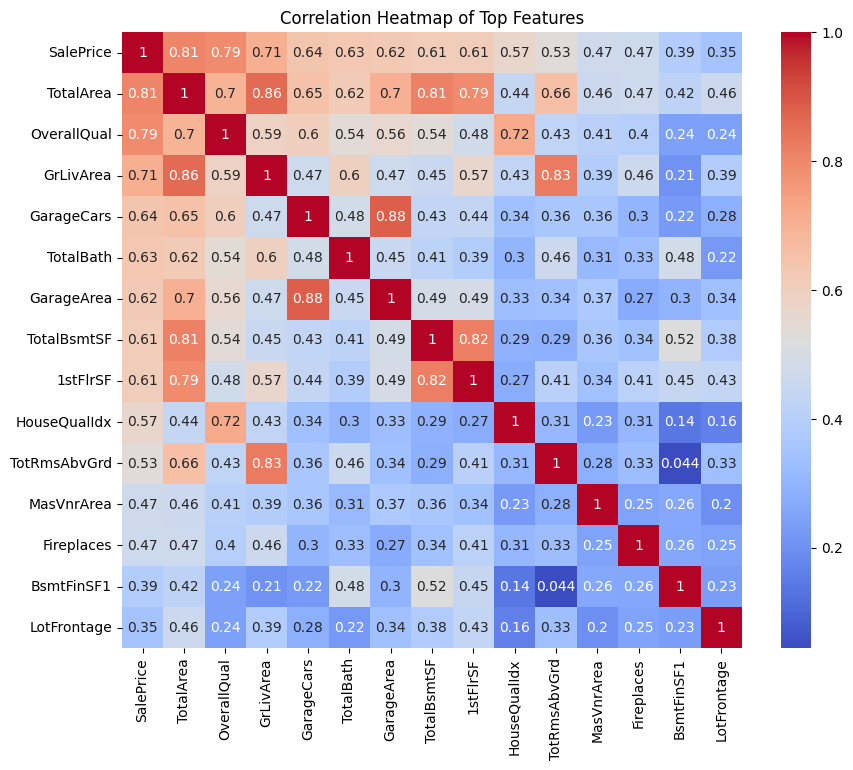

In [14]:
# Select only numerical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numerical columns
corr_matrix = train_data[numerical_cols].corr()

# Focus on correlation with the target variable (SalePrice or LogSalePrice)
corr_target = corr_matrix['SalePrice'].sort_values(ascending=False)

# Display top correlated features
print("Top correlated features with SalePrice:\n", corr_target.head(20))

# Visualize correlation heatmap for top features
top_corr_features = corr_target.index[:15]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top Features")
plt.show()

### Feature Importance Analysis (using Random Forest)

In [15]:
from sklearn.ensemble import RandomForestRegressor
# Identify numerical columns only
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Drop the target variable from the feature set
X = train_data[numerical_cols].drop(['SalePrice'], axis=1, errors='ignore')

# Prepare target variable
y = train_data['SalePrice']

# Train Random Forest for feature importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features by Importance:")
print(feature_importances.head(20))


Top Features by Importance:
         Feature  Importance
27     TotalArea    0.595212
4    OverallQual    0.191084
12      2ndFlrSF    0.027648
32  HouseQualIdx    0.025600
28      HouseAge    0.019500
7     BsmtFinSF1    0.014884
29    RemodelAge    0.014879
3        LotArea    0.011657
2    LotFrontage    0.009117
9      BsmtUnfSF    0.008787
14     GrLivArea    0.008351
19   GarageYrBlt    0.008088
30     TotalBath    0.008042
6     MasVnrArea    0.006130
21    GarageArea    0.005075
10   TotalBsmtSF    0.005066
0             Id    0.004972
11      1stFlrSF    0.004579
31  TotalPorchSF    0.004484
25        MoSold    0.004065


After performing **correlation analysis** and **feature importance analysis (using Random Forest)** on the dataset, the following features were selected for modeling. These features were chosen based on their strong relationship with the target variable (`SalePrice`) and their potential to contribute significantly to predictive accuracy.

---

#### **1. TotalArea**
- **Correlation**: Strongly correlated with `SalePrice` (0.807), making it one of the most important features.
- **Feature Importance**: Highest importance in Random Forest analysis (0.595).
- **Reason for Inclusion**: Combines `GrLivArea`, `GarageArea`, and `TotalBsmtSF`, summarizing the total usable area in a property.

---

#### **2. OverallQual**
- **Correlation**: Highly correlated with `SalePrice` (0.791).
- **Feature Importance**: Second-highest importance in Random Forest analysis (0.191).
- **Reason for Inclusion**: Captures the overall material and finish quality of the house, a critical determinant of property value.

---

#### **3. GarageCars**
- **Correlation**: Strong correlation with `SalePrice` (0.640).
- **Reason for Inclusion**: Indicates garage capacity, an important practical feature for buyers.

---

#### **4. TotalBath**
- **Correlation**: Moderately correlated with `SalePrice` (0.632).
- **Reason for Inclusion**: Provides a comprehensive count of all bathrooms (full and half) across the property.

---

#### **5. HouseQualIdx**
- **Correlation**: Moderately correlated with `SalePrice` (0.565).
- **Feature Importance**: Significant in Random Forest analysis (0.026).
- **Reason for Inclusion**: A composite feature that combines `OverallQual` and `OverallCond`, providing an additional layer of detail about property quality.

---

#### **6. 2ndFlrSF** and **1stFlrSF**
- **Correlation**: `2ndFlrSF` (0.319) and `1stFlrSF` (0.606).
- **Feature Importance**: `2ndFlrSF` had moderate importance in Random Forest (0.028).
- **Reason for Inclusion**: While `TotalArea` summarizes the overall usable space, these features provide granularity about the distribution of living area across floors.

---

#### **7. MasVnrArea**
- **Correlation**: Moderately correlated with `SalePrice` (0.473).
- **Reason for Inclusion**: Represents the masonry veneer area, which affects aesthetics and construction cost.

---

#### **8. Neighborhood**
- **Reason for Inclusion**: Captures location-specific pricing variations, often one of the most critical factors in housing data.

---

#### **9. MSZoning**
- **Reason for Inclusion**: Encodes zoning classification, impacting property value based on permissible land use.

---

This reduced feature set balances strong predictive power with simplicity, reducing redundancy while retaining key information for modeling.

In [16]:
# List of selected features
selected_features = [
    'TotalArea', 'OverallQual', 'GarageCars', 
    'TotalBath', 'HouseQualIdx', 
    '2ndFlrSF', 'MasVnrArea', '1stFlrSF', 'Neighborhood', 'MSZoning'
]

# Retain selected features in training and test datasets
train = train_data[selected_features + ['SalePrice']]
test = test_data[selected_features]

## Target Variable Transformation
- The target variable (SalePrice) is likely skewed. We'll apply a log transformation to normalize its distribution.
- This step ensures that errors in predicting expensive and inexpensive houses affect the evaluation metric (RMSE) equally.

In [17]:
# Log-transform SalePrice
train['LogSalePrice'] = np.log1p(train['SalePrice'])

# Drop the original SalePrice column
train.drop(['SalePrice'], axis=1, inplace=True)

- Verify the distribution:

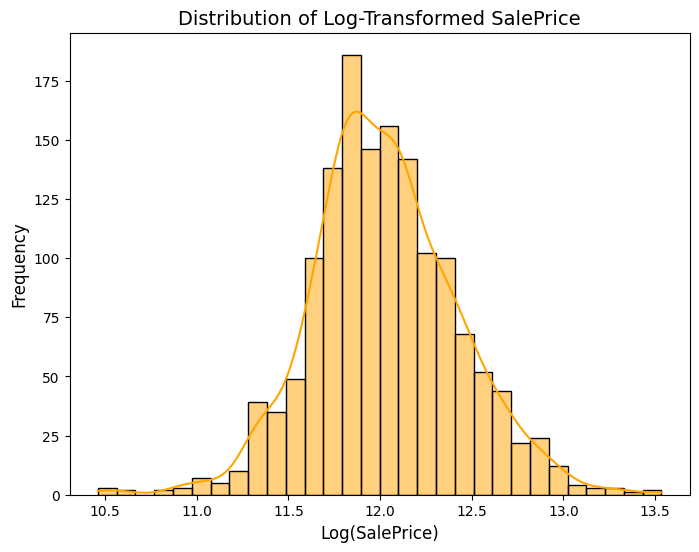

In [18]:
# Visualize the transformed target
plt.figure(figsize=(8, 6))
sns.histplot(train['LogSalePrice'], kde=True, bins=30, color='orange')
plt.title('Distribution of Log-Transformed SalePrice', fontsize=14)
plt.xlabel('Log(SalePrice)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## Handle Outliers

In [19]:
# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to check for outliers
numerical_cols = ['TotalArea', 'OverallQual', 'GarageCars', 'TotalBath', 
                  'HouseQualIdx', '2ndFlrSF', 'MasVnrArea', '1stFlrSF']

# Remove outliers
train = remove_outliers(train, numerical_cols)

## Scale and Standardize Features

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose scaling method
scaler = MinMaxScaler()  # or StandardScaler()

# Scale numerical columns
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

## Encode Categorical Features
- As machine learning models require numerical input, so categorical variables like Neighborhood and MSZoning must be encoded.

Given our dataset and the selected features, we will use Label Encoding:
- Reason: we're likely to use tree-based models like Random Forest or Gradient Boosting, which handle categorical relationships naturally.
- Efficiency: Avoids increasing the number of features significantly, keeping the dataset compact.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical features
categorical_cols = ['Neighborhood', 'MSZoning']
le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

## Split the Data for Training and Validation

In [22]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = train.drop(['LogSalePrice'], axis=1)
y = train['LogSalePrice']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape}, Validation set size: {X_val.shape}")

Training set size: (776, 10), Validation set size: (195, 10)


## Model Selection and Training

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a Random Forest model
baseline_model = RandomForestRegressor(random_state=42)
baseline_model.fit(X_train, y_train)

# Predict on validation set
y_pred = baseline_model.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Baseline Model RMSE: {rmse}")

Baseline Model RMSE: 0.11861599818387866


In [24]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred_xgb = xgb_model.predict(X_val)

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print(f"XGBoost Model RMSE: {rmse_xgb}")

XGBoost Model RMSE: 0.11995201840352658


In [25]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Initialize LightGBM model with reduced verbosity
lgbm = LGBMRegressor(random_state=42, verbose=-1)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and RMSE
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"LightGBM RMSE: {rmse}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
LightGBM RMSE: 0.11415552511994441


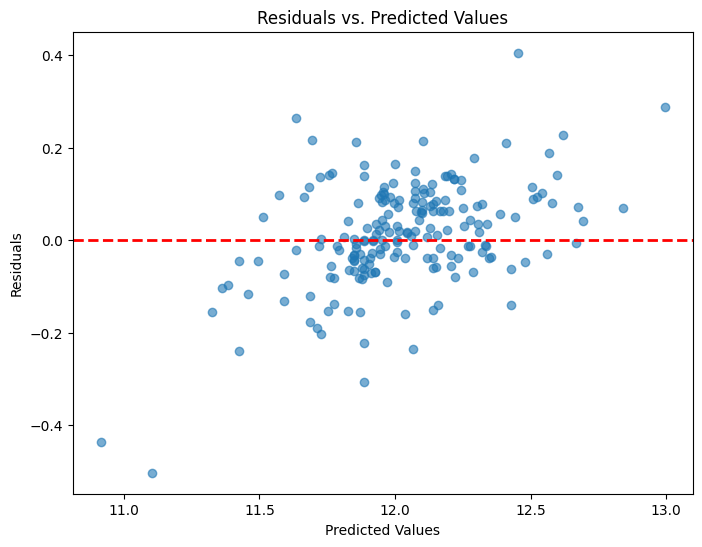

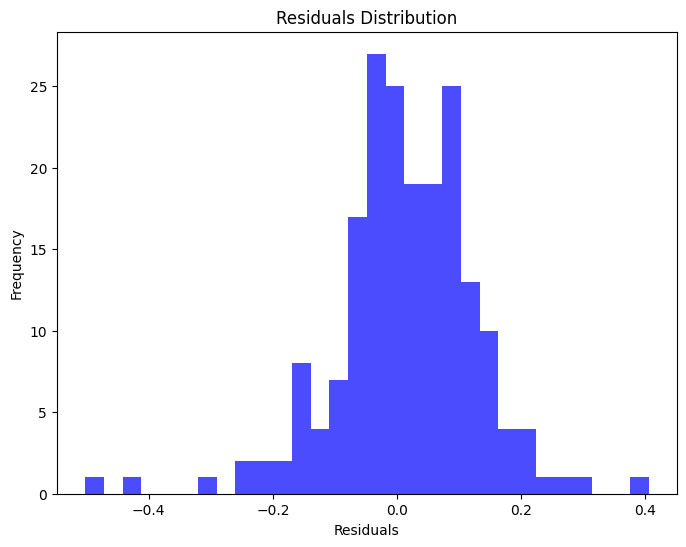

In [26]:
# Calculate residuals
residuals = y_val - best_model.predict(X_val)

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_val, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [27]:
test_ids = test_data['Id']

# Predict on test data
test_predictions = best_model.predict(test)

# Convert predictions back to original scale
final_predictions = np.expm1(test_predictions)

# Prepare submission dataframe
submission = pd.DataFrame({
    'Id': test_ids,  
    'SalePrice': final_predictions
})

# Save submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!


In [28]:
print(submission.head())  # Preview the submission file
print(submission.info())  # Check for missing or incorrect values

     Id      SalePrice
0  1461  130313.433715
1  1462  157986.509966
2  1463  157850.849089
3  1464  177182.422752
4  1465  176472.188369
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None


#### **Project Evaluation and Insights**

**Key Insights on Factors Influencing House Prices**:
- The most significant predictor of house prices is `TotalArea`, highlighting the importance of property size.
- Features like `OverallQual` and `TotalBath` emphasize the impact of build quality and functional spaces on pricing.
- Categorical features such as `Neighborhood` and `MSZoning` reveal the influence of location and zoning regulations on property values.

**Model Performance on Test Data**:
- The LightGBM model achieved an RMSE of **0.1142** on the validation set, demonstrating strong predictive accuracy.
- Key preprocessing steps like outlier handling, feature scaling, and encoding contributed to the model's performance.

**Opportunities for Improvement**:
- Residual analysis suggests slight over- and under-predictions for high-value properties, indicating the potential for refining features related to luxury homes.
- Exploring interaction terms or advanced feature engineering (e.g., location-based price trends) could further enhance accuracy.
- Ensembling multiple models may help reduce variance and improve predictions for edge cases.